In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv')

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN
6,Afghanistan,2011,1626.764793,NaN
7,Afghanistan,2010,1671.581238,NaN
8,Afghanistan,2009,1502.354073,NaN
9,Afghanistan,2008,1267.644939,NaN


In [4]:
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [5]:
gdp_df = pd.read_csv('data/gdp_per_capita.csv', skipfooter=2, engine='python')

In [6]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


In [7]:
gdp_df.shape

(6500, 4)

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 4 columns):
Country or Area    6500 non-null object
Year               6500 non-null int64
Value              6500 non-null float64
Value Footnotes    1 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 203.2+ KB


In [9]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)

In [10]:
gdp_df.head()

,Country or Area,Year,Value
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [11]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [12]:
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


In [13]:
continents = pd.read_csv('data/continents.csv')

In [14]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [15]:
gdp_df= gdp_df.replace({'Country':{"CÃƒÂ´te d'Ivoire":'Ivory Coast','SÃƒÂ£o TomÃƒÂ© and Principe':'Sao Tome and Principe','Sint Maarten (Dutch part)':'Sint Maarten','CuraÃƒÂ§ao':'Curaçao'}})

In [17]:
gdp_df= pd.merge(gdp_df,continents, on='Country')

In [18]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 204.1+ KB


In [19]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

Wall time: 4 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

In [20]:
gdp_df['Continent'] = gdp_df.Continent.astype('category')

In [21]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5225 entries, 0 to 5224
Data columns (total 4 columns):
Country           5225 non-null object
Year              5225 non-null int64
GDP_Per_Capita    5225 non-null float64
Continent         5225 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 168.6+ KB


In [22]:
%%time
gdp_df.groupby('Continent').GDP_Per_Capita.mean()

Wall time: 4.01 ms


Continent
Africa            4588.289835
Asia             21174.893215
Europe           26497.245133
North America    19228.818275
Oceania           8818.318792
South America    10989.950644
Name: GDP_Per_Capita, dtype: float64

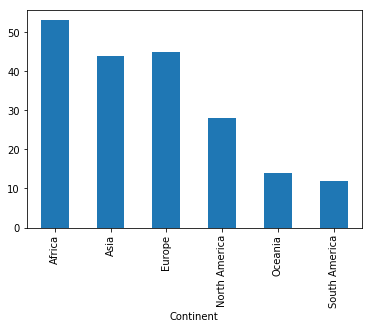

In [23]:
gdp_df.groupby('Continent')['Country'].nunique().plot('bar')

In [24]:
gdp_df['Country'].nunique()

196

In [25]:
gdp_df['Year'].nunique()

28

In [26]:
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
1,Afghanistan,2016,1757.023490,Asia
2,Afghanistan,2015,1766.593077,Asia
3,Afghanistan,2014,1795.735834,Asia
4,Afghanistan,2013,1807.762344,Asia


In [31]:
df2014= gdp_df['Year']==2014

In [37]:
gdp_2014= gdp_df[df2014]

In [39]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,193.0,193.000000
mean,2014.0,18784.375312
std,0.0,20682.299929
min,2014.0,377.908916
25%,2014.0,4161.895062
50%,2014.0,11887.389712
75%,2014.0,26442.682003
max,2014.0,130439.187070


In [40]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Continent
2950,Mauritania,2014,377.908916,Africa
924,Central African Republic,2014,676.675821,Africa
739,Burundi,2014,768.469837,Africa
1245,Dem. Rep. Congo,2014,784.872656,Africa
3369,Niger,2014,900.136918,Africa
3162,Mozambique,2014,1117.872529,Africa
2787,Malawi,2014,1142.530804,Africa
2643,Liberia,2014,1257.625441,Africa
2759,Madagascar,2014,1372.015959,Africa
1543,Ethiopia,2014,1413.962518,Africa


In [41]:
gdp_2014.sort_values(by=['GDP_Per_Capita'], ascending=False)

,Country,Year,GDP_Per_Capita,Continent
2731,"Macao SAR, China",2014,130439.187070,Asia
3779,Qatar,2014,116693.507701,Asia
2703,Luxembourg,2014,92349.186486,Europe
4082,Singapore,2014,81965.361071,Asia
655,Brunei,2014,76448.593329,Asia
2484,Kuwait,2014,72588.486007,Asia
3453,Norway,2014,63419.314779,Europe
4899,United Arab Emirates,2014,62948.677902,Asia
904,Cayman Islands,2014,62929.874528,North America
4461,Switzerland,2014,57218.027926,Europe


In [43]:
gdp_2014['GDP_Per_Capita'].quantile(.25)

4161.89506238384

In [57]:
gdp_2014.drop(['GDP_Group'], axis=1)
gdp_2014.shape

(193, 6)

In [59]:
gdp_2014.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'GDP_Group',
       'Percentile'],
      dtype='object')

In [154]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,193.0,193.000000
mean,2014.0,18784.375312
std,0.0,20682.299929
min,2014.0,377.908916
25%,2014.0,4161.895062
50%,2014.0,11887.389712
75%,2014.0,26442.682003
max,2014.0,130439.187070


In [67]:
col= 'GDP_Per_Capita'
query= [ gdp_2014[col] <= 4161.88, (gdp_2014[col] < 26442.67) & (gdp_2014[col]> 4161.89), gdp_2014[col] >= 26442.68 ]
label= ['low', 'medium', 'high']
gdp_2014['GDP_Group']= np.select(query, label)
print(gdp_2014)

C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


                     Country  Year  GDP_Per_Capita      Continent GDP_Group  \
3                Afghanistan  2014     1795.735834           Asia       low   
19                   Albania  2014    10700.522802         Europe    medium   
47                   Algeria  2014    13549.025150         Africa    medium   
75                    Angola  2014     6813.052106         Africa    medium   
103      Antigua and Barbuda  2014    20820.551057  North America    medium   
131                Argentina  2014    18935.002497  South America    medium   
159                  Armenia  2014     7954.195331         Europe    medium   
187                    Aruba  2014    36172.933355  North America      high   
215                Australia  2014    43672.130373        Oceania      high   
243                  Austria  2014    44246.893265         Europe      high   
271               Azerbaijan  2014    16853.568469         Europe    medium   
299                  Bahrain  2014    43847.909052  

In [68]:
gdp_2014.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'GDP_Group',
       'Percentile'],
      dtype='object')

In [69]:
gdp_2014 = gdp_2014.drop('Percentile', axis= 1)

In [70]:
gdp_2014.columns

Index(['Country', 'Year', 'GDP_Per_Capita', 'Continent', 'GDP_Group'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190E0661908>]],
      dtype=object)

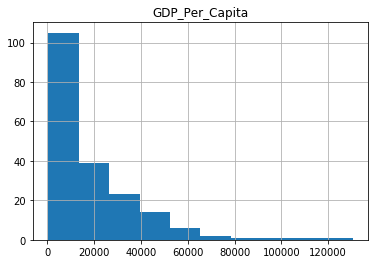

In [72]:
gdp_2014.hist(column='GDP_Per_Capita')

# The plot is left skewed. Most countries are lower than 20k in GDP with a few outlying countries 80k and higher.

In [75]:
gdp_2014['GDP_Per_Capita'].skew() 

2.2436984354176537

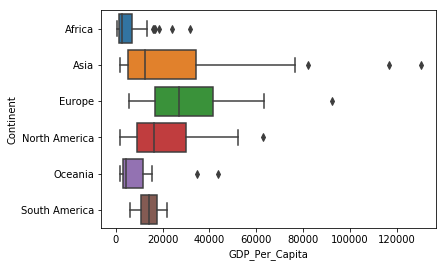

In [78]:
sns.boxplot(x='GDP_Per_Capita', y='Continent',
                data=gdp_2014)

In [86]:
gdp_1790= gdp_df[gdp_df['Year'].isin([2017, 1990])]
gdp_1790.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2017,1758.465636,Asia
16,Albania,2017,11803.283883,Europe
43,Albania,1990,4458.247662,Europe
44,Algeria,2017,13876.294642,Africa
71,Algeria,1990,10297.842349,Africa


In [107]:
gdp_pivot= gdp_1790.pivot(index='Country', columns= 'Year', values='GDP_Per_Capita').reset_index()
gdp_pivot.index.name= None
gdp_pivot.head()

Year,Country,1990,2017
0,Afghanistan,NaN,1758.465636
1,Albania,4458.247662,11803.283883
2,Algeria,10297.842349,13876.294642
3,Angola,4761.229638,6044.972035
4,Antigua and Barbuda,17472.946483,22855.748017


In [108]:
gdp_pivot = gdp_pivot.dropna()
#gdp_pivot= gdp_pivot.MultiIndex.rename(['Country'], level=1) 
gdp_pivot.columns

Index(['Country', 1990, 2017], dtype='object', name='Year')

In [112]:
gdp_pivot['Percent_Change']= (gdp_pivot[2017] - gdp_pivot[1990]) * 100/gdp_pivot[1990]
gdp_pivot.head(7)

Year,Country,1990,2017,Percent_Change
1,Albania,4458.247662,11803.283883,164.751642
2,Algeria,10297.842349,13876.294642,34.749535
3,Angola,4761.229638,6044.972035,26.962413
4,Antigua and Barbuda,17472.946483,22855.748017,30.806490
5,Argentina,11372.823108,18945.144022,66.582596
6,Armenia,3742.431024,8744.731368,133.664463
7,Aruba,37140.024657,35861.828118,-3.441561


In [133]:
sum(gdp_pivot['Percent_Change'] > 0)/gdp_pivot['Percent_Change'].count()*100

89.02439024390245

In [134]:
sum(gdp_pivot['Percent_Change'] < 0)/gdp_pivot['Percent_Change'].count()*100

10.975609756097562

In [136]:
gdp_pivot['Percent_Change'].max()

2090.973464237512

In [171]:
EQ = gdp_pivot[gdp_pivot['Percent_Change']==gdp_pivot['Percent_Change'].max()]
EQ

Year,Country,1990,2017,Percent_Change
52,Equatorial Guinea,1017.764136,22298.942144,2090.973464


[array([1017.76413582]), array([22298.94214441])]


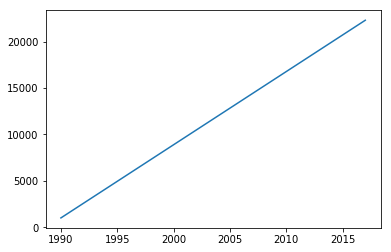

In [176]:
Year= [1990, 2017]
GDP= [EQ[1990].values,EQ[2017].values]
print(GDP)
plt.plot(Year, GDP)

#EQ.plot(x ='Year', y='GDP_Per_Capita', kind = 'line')

In [139]:
gdp_pivot['Percent_Change'].nlargest(2)

52    2090.973464
36     902.257241
Name: Percent_Change, dtype: float64

In [185]:
internet_df = pd.read_csv('data/internet_use.csv', usecols = [0,1,2], nrows=4495, engine='python')
internet_df.tail()

,Country or Area,Year,Value
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [186]:
internet_df= internet_df.rename(columns={"Country or Area": 'Country',"Value":"Internet_Users_Pct"})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [187]:
internet_df.info

<bound method DataFrame.info of           Country  Year  Internet_Users_Pct
0     Afghanistan  2014            6.390000
1     Afghanistan  2013            5.900000
2     Afghanistan  2012            5.454545
3     Afghanistan  2011            5.000000
4     Afghanistan  2010            4.000000
5     Afghanistan  2009            3.550000
6     Afghanistan  2008            1.840000
7     Afghanistan  2007            1.900000
8     Afghanistan  2006            2.107124
9     Afghanistan  2005            1.224148
10    Afghanistan  2004            0.105809
11    Afghanistan  2003            0.087891
12    Afghanistan  2002            0.004561
13    Afghanistan  2001            0.004723
14    Afghanistan  1990            0.000000
15        Albania  2014           60.100000
16        Albania  2013           57.200000
17        Albania  2012           54.655959
18        Albania  2011           49.000000
19        Albania  2010           45.000000
20        Albania  2009           41.200000


In [192]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, on=['Country', 'Year'])
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [193]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3528,Zimbabwe,1997,3036.422224,Africa,0.033080
3529,Zimbabwe,1996,2985.856605,Africa,0.016790
3530,Zimbabwe,1995,2736.486436,Africa,0.007684
3531,Zimbabwe,1994,2768.309953,Africa,0.001739
3532,Zimbabwe,1990,2819.549467,Africa,0.000000


In [195]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year']==2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.522802,Europe,60.10
34,Algeria,2014,13549.025150,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20820.551057,North America,64.00


In [199]:
gdp_and_internet_use_2014['Internet_Users_Pct'].mean()

44.550727151515154

In [205]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014.Internet_Users_Pct > 90].count()
 

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

In [213]:
gdp_and_internet_use_2014['GDP_Per_Capita'].nlargest(5)

2556    116693.507701
1812     92349.186486
2779     81965.361071
1685     72588.486007
2310     63419.314779
Name: GDP_Per_Capita, dtype: float64

In [215]:
gdp_and_internet_use_2014.nlargest(5,['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186486,Europe,94.67
2779,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.486007,Asia,78.70
2310,Norway,2014,63419.314779,Europe,96.30


In [246]:
Top_5 = ['Qatar','Luxembourg','Singapore','Kuwait','Norway']

In [247]:
Top_5 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar', 'Luxembourg', 'Singapore', 'Kuwait', 'Norway'])]
Top_5.head()


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1685,Kuwait,2014,72588.486007,Asia,78.700000
1686,Kuwait,2013,75597.292936,Asia,75.460000
1687,Kuwait,2012,78700.458568,Asia,70.450000
1688,Kuwait,2011,78021.671676,Asia,65.769071
1689,Kuwait,2010,75359.963489,Asia,61.400000


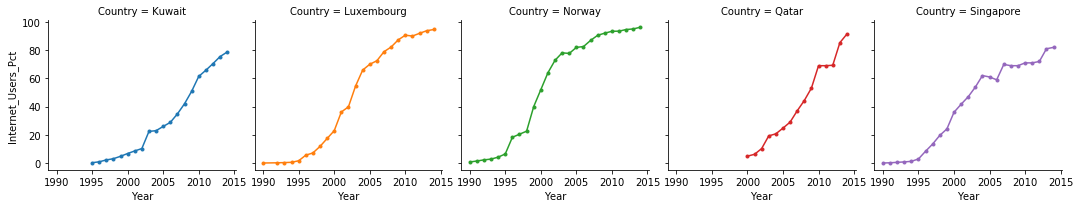

In [251]:
grid = sns.FacetGrid(Top_5, col="Country", hue="Country")
grid.map(plt.plot, "Year","Internet_Users_Pct", marker='.');

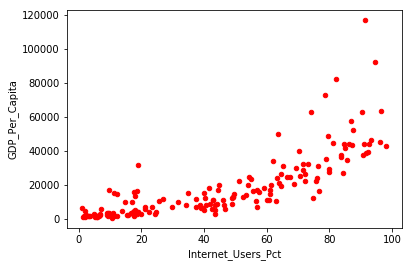

In [256]:
gdp_and_internet_use_2014.plot(kind='scatter', x='Internet_Users_Pct', y='GDP_Per_Capita', c= "r")

In [258]:
gdp_and_internet_use_2014[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.788933
Internet_Users_Pct,0.788933,1.000000


The .788 correlation value means there's a close positive relationship between GDP and Internet

In [260]:
x = gdp_and_internet_use_2014['GDP_Per_Capita']
x = sm.add_constant(x)
x.head()

,const,GDP_Per_Capita
0,1.0,1795.735834
13,1.0,10700.522802
34,1.0,13549.025150
56,1.0,6813.052106
76,1.0,20820.551057


In [262]:
y = gdp_and_internet_use_2014['Internet_Users_Pct']
model = sm.OLS(y, x)
ols_result = model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.65e-36
Time:                        20:37:45   Log-Likelihood:                -710.70
No. Observations:                 165   AIC:                             1425.
Df Residuals:                     163   BIC:                             1432.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             22.3984      1.951     11.

r^2= .622. It means that 60% of the variation in internet users is due to the variation in GDP.

In [264]:
gdp_and_internet_use_2014['GPC'] = gdp_and_internet_use_2014['GDP_Per_Capita'].apply(np.log)
gdp_and_internet_use_2014.head()

C:\Users\DP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GPC
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.522802,Europe,60.10,9.278048
34,Algeria,2014,13549.025150,Africa,18.09,9.514070
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20820.551057,North America,64.00,9.943696


In [265]:
gdp_and_internet_use_2014[['GPC', 'Internet_Users_Pct']].corr()

,GPC,Internet_Users_Pct
GPC,1.000000,0.878314
Internet_Users_Pct,0.878314,1.000000


In [267]:
x = gdp_and_internet_use_2014['GDP_Per_Capita']
x = sm.add_constant(x)
y = gdp_and_internet_use_2014['GPC']
model = sm.OLS(y, x)
ols_result = model.fit()
print(ols_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPC   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     394.9
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           2.08e-45
Time:                        20:57:48   Log-Likelihood:                -159.99
No. Observations:                 165   AIC:                             324.0
Df Residuals:                     163   BIC:                             330.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.2836      0.069    119.

In [268]:
US = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['United States'])]
US.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3357,United States,2014,52080.792568,North America,87.360000
3358,United States,2013,51208.892428,North America,84.200000
3359,United States,2012,50632.443448,North America,79.300000
3360,United States,2011,49883.113984,North America,69.729461
3361,United States,2010,49479.248679,North America,71.690000


In [269]:
US[['GDP_Per_Capita', 'Internet_Users_Pct']].corr()

,GDP_Per_Capita,Internet_Users_Pct
GDP_Per_Capita,1.000000,0.991618
Internet_Users_Pct,0.991618,1.000000


I don't feel like this is particularly useful.

Solo Exploration

Pulled in data for literacy rates for years 

In [309]:
lit_rates = pd.read_csv('data/literacy_rates.csv', skipfooter=4, engine='python')
lit_rates.tail()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
301,World,Male 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,92,3
302,Yemen,Female 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,74,1
303,Yemen,Male 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,96,1
304,Zambia,Female 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,67,1
305,Zambia,Male 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,82,1


In [310]:
lit_rates.head()

,Country or Area,Subgroup,Year,Source,Unit,Value,Value Footnotes
0,Albania,Female 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,99,1
1,Albania,Male 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,99,1
2,Algeria,Female 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,89,2
3,Algeria,Male 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,94,2
4,Angola,Female 15-24 yr,2007-2011,UN_UNESCO Institute for Statistics (UIS),Percent,66,1


In [311]:
lit_rates.isnull().sum()

Country or Area    0
Subgroup           0
Year               0
Source             0
Unit               0
Value              0
Value Footnotes    0
dtype: int64

Dropped unnecessary columns and renamed columns

In [312]:
lit_rates = lit_rates.drop(['Value Footnotes', 'Source', 'Unit'], axis=1)

In [313]:
lit_rates = lit_rates.rename(columns={"Country or Area": 'Country', 'Value': 'Literacy_Rate_Pct'})
lit_rates.head()

,Country,Subgroup,Year,Literacy_Rate_Pct
0,Albania,Female 15-24 yr,2007-2011,99
1,Albania,Male 15-24 yr,2007-2011,99
2,Algeria,Female 15-24 yr,2007-2011,89
3,Algeria,Male 15-24 yr,2007-2011,94
4,Angola,Female 15-24 yr,2007-2011,66


In [315]:
lit_rates = lit_rates.groupby('Country')['Literacy_Rate_Pct'].mean()
lit_rates = lit_rates.to_frame().reset_index()
lit_rates.head()

,Country,Literacy_Rate_Pct
0,Albania,99.0
1,Algeria,91.5
2,Angola,73.0
3,Argentina,99.0
4,Armenia,100.0


In [316]:
gdp_and_internet_use_0711 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2007','2008','2009','2010','2011'])]
gdp_and_internet_use_0711.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3,Afghanistan,2011,1626.764793,Asia,5.00
4,Afghanistan,2010,1671.581238,Asia,4.00
5,Afghanistan,2009,1502.354073,Asia,3.55
6,Afghanistan,2008,1267.644939,Asia,1.84
7,Afghanistan,2007,1247.753118,Asia,1.90


In [320]:
Avg = gdp_and_internet_use_0711.groupby(['Country', 'Continent'])['Internet_Users_Pct'].mean()
Avg = Avg.to_frame().reset_index()
Avg.head()

,Country,Continent,Internet_Users_Pct
0,Afghanistan,Asia,3.258000
1,Albania,Europe,34.819223
2,Algeria,Africa,11.472238
3,Angola,Africa,7.715200
4,Antigua and Barbuda,North America,42.600000


Merged Literacy Rates and Internet User Percentage

In [321]:
Lit_rate_vs_Int_Users_Pct= pd.merge(Avg,lit_rates, on='Country')
Lit_rate_vs_Int_Users_Pct.head()

,Country,Continent,Internet_Users_Pct,Literacy_Rate_Pct
0,Albania,Europe,34.819223,99.0
1,Algeria,Africa,11.472238,91.5
2,Angola,Africa,7.715200,73.0
3,Argentina,South America,36.811851,99.0
4,Armenia,Europe,16.906251,100.0


In [345]:
Lit_rate_vs_Int_Users_Pct['Continent'].value_counts()

Africa           42
Asia             32
Europe           24
North America    10
South America     9
Oceania           4
Name: Continent, dtype: int64

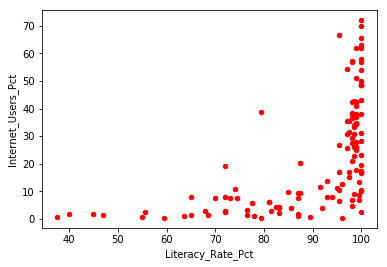

In [340]:
Lit_rate_vs_Int_Users_Pct.plot(kind='scatter', x='Literacy_Rate_Pct', y='Internet_Users_Pct', c= "r")

Text(0.5, 0.98, '2007 - 2011')

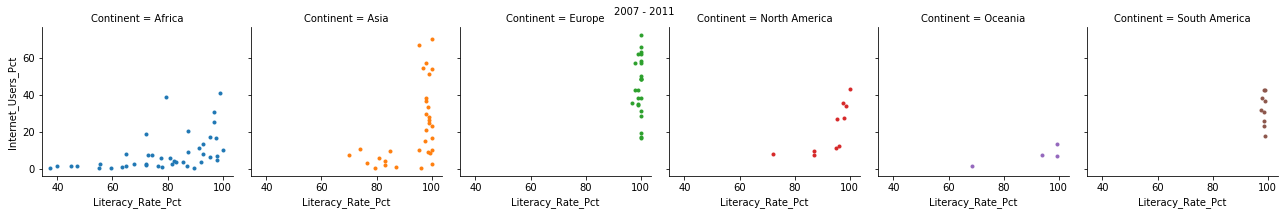

In [346]:
grid = sns.FacetGrid(Lit_rate_vs_Int_Users_Pct, col="Continent", hue="Continent")
grid.map(plt.scatter ,"Literacy_Rate_Pct", "Internet_Users_Pct", marker='.');
grid.fig.suptitle('2007 - 2011', fontsize=10)


In [338]:
Lit_rate_vs_Int_Users_Pct[['Internet_Users_Pct', 'Literacy_Rate_Pct']].corr()

,Internet_Users_Pct,Literacy_Rate_Pct
Internet_Users_Pct,1.000000,0.577367
Literacy_Rate_Pct,0.577367,1.000000


In [342]:
x = Lit_rate_vs_Int_Users_Pct['Literacy_Rate_Pct']
x = sm.add_constant(x)
y = Lit_rate_vs_Int_Users_Pct['Internet_Users_Pct']
model = sm.OLS(y, x)
lit_rate_vs_int_users = model.fit()
print(lit_rate_vs_int_users.summary())

                            OLS Regression Results                            
Dep. Variable:     Internet_Users_Pct   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     59.51
Date:                Thu, 19 Sep 2019   Prob (F-statistic):           4.14e-12
Time:                        20:32:42   Log-Likelihood:                -508.11
No. Observations:                 121   AIC:                             1020.
Df Residuals:                     119   BIC:                             1026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -48.8885      9.34